<a href="https://colab.research.google.com/drive/1ESK-lBRHYJGi_jjz3rAKJ_tkhoth-Pnz?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")

Preprocesando los datos

In [4]:
feature = np.array(data.columns.to_list())

In [5]:
nan_val_col = feature[np.array(data.isnull().sum())>146]
nan_val_col

array(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype='<U13')

In [6]:
data_temp = data.drop(nan_val_col, axis=1)
test_data.drop(nan_val_col, axis=1, inplace=True)

In [7]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

In [8]:
# Eliminando las características que sólo se centraban en una categoría.
data_temp.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

In [9]:
test_data.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

In [10]:
#actualizandolas
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

Analizemos los datos continuos


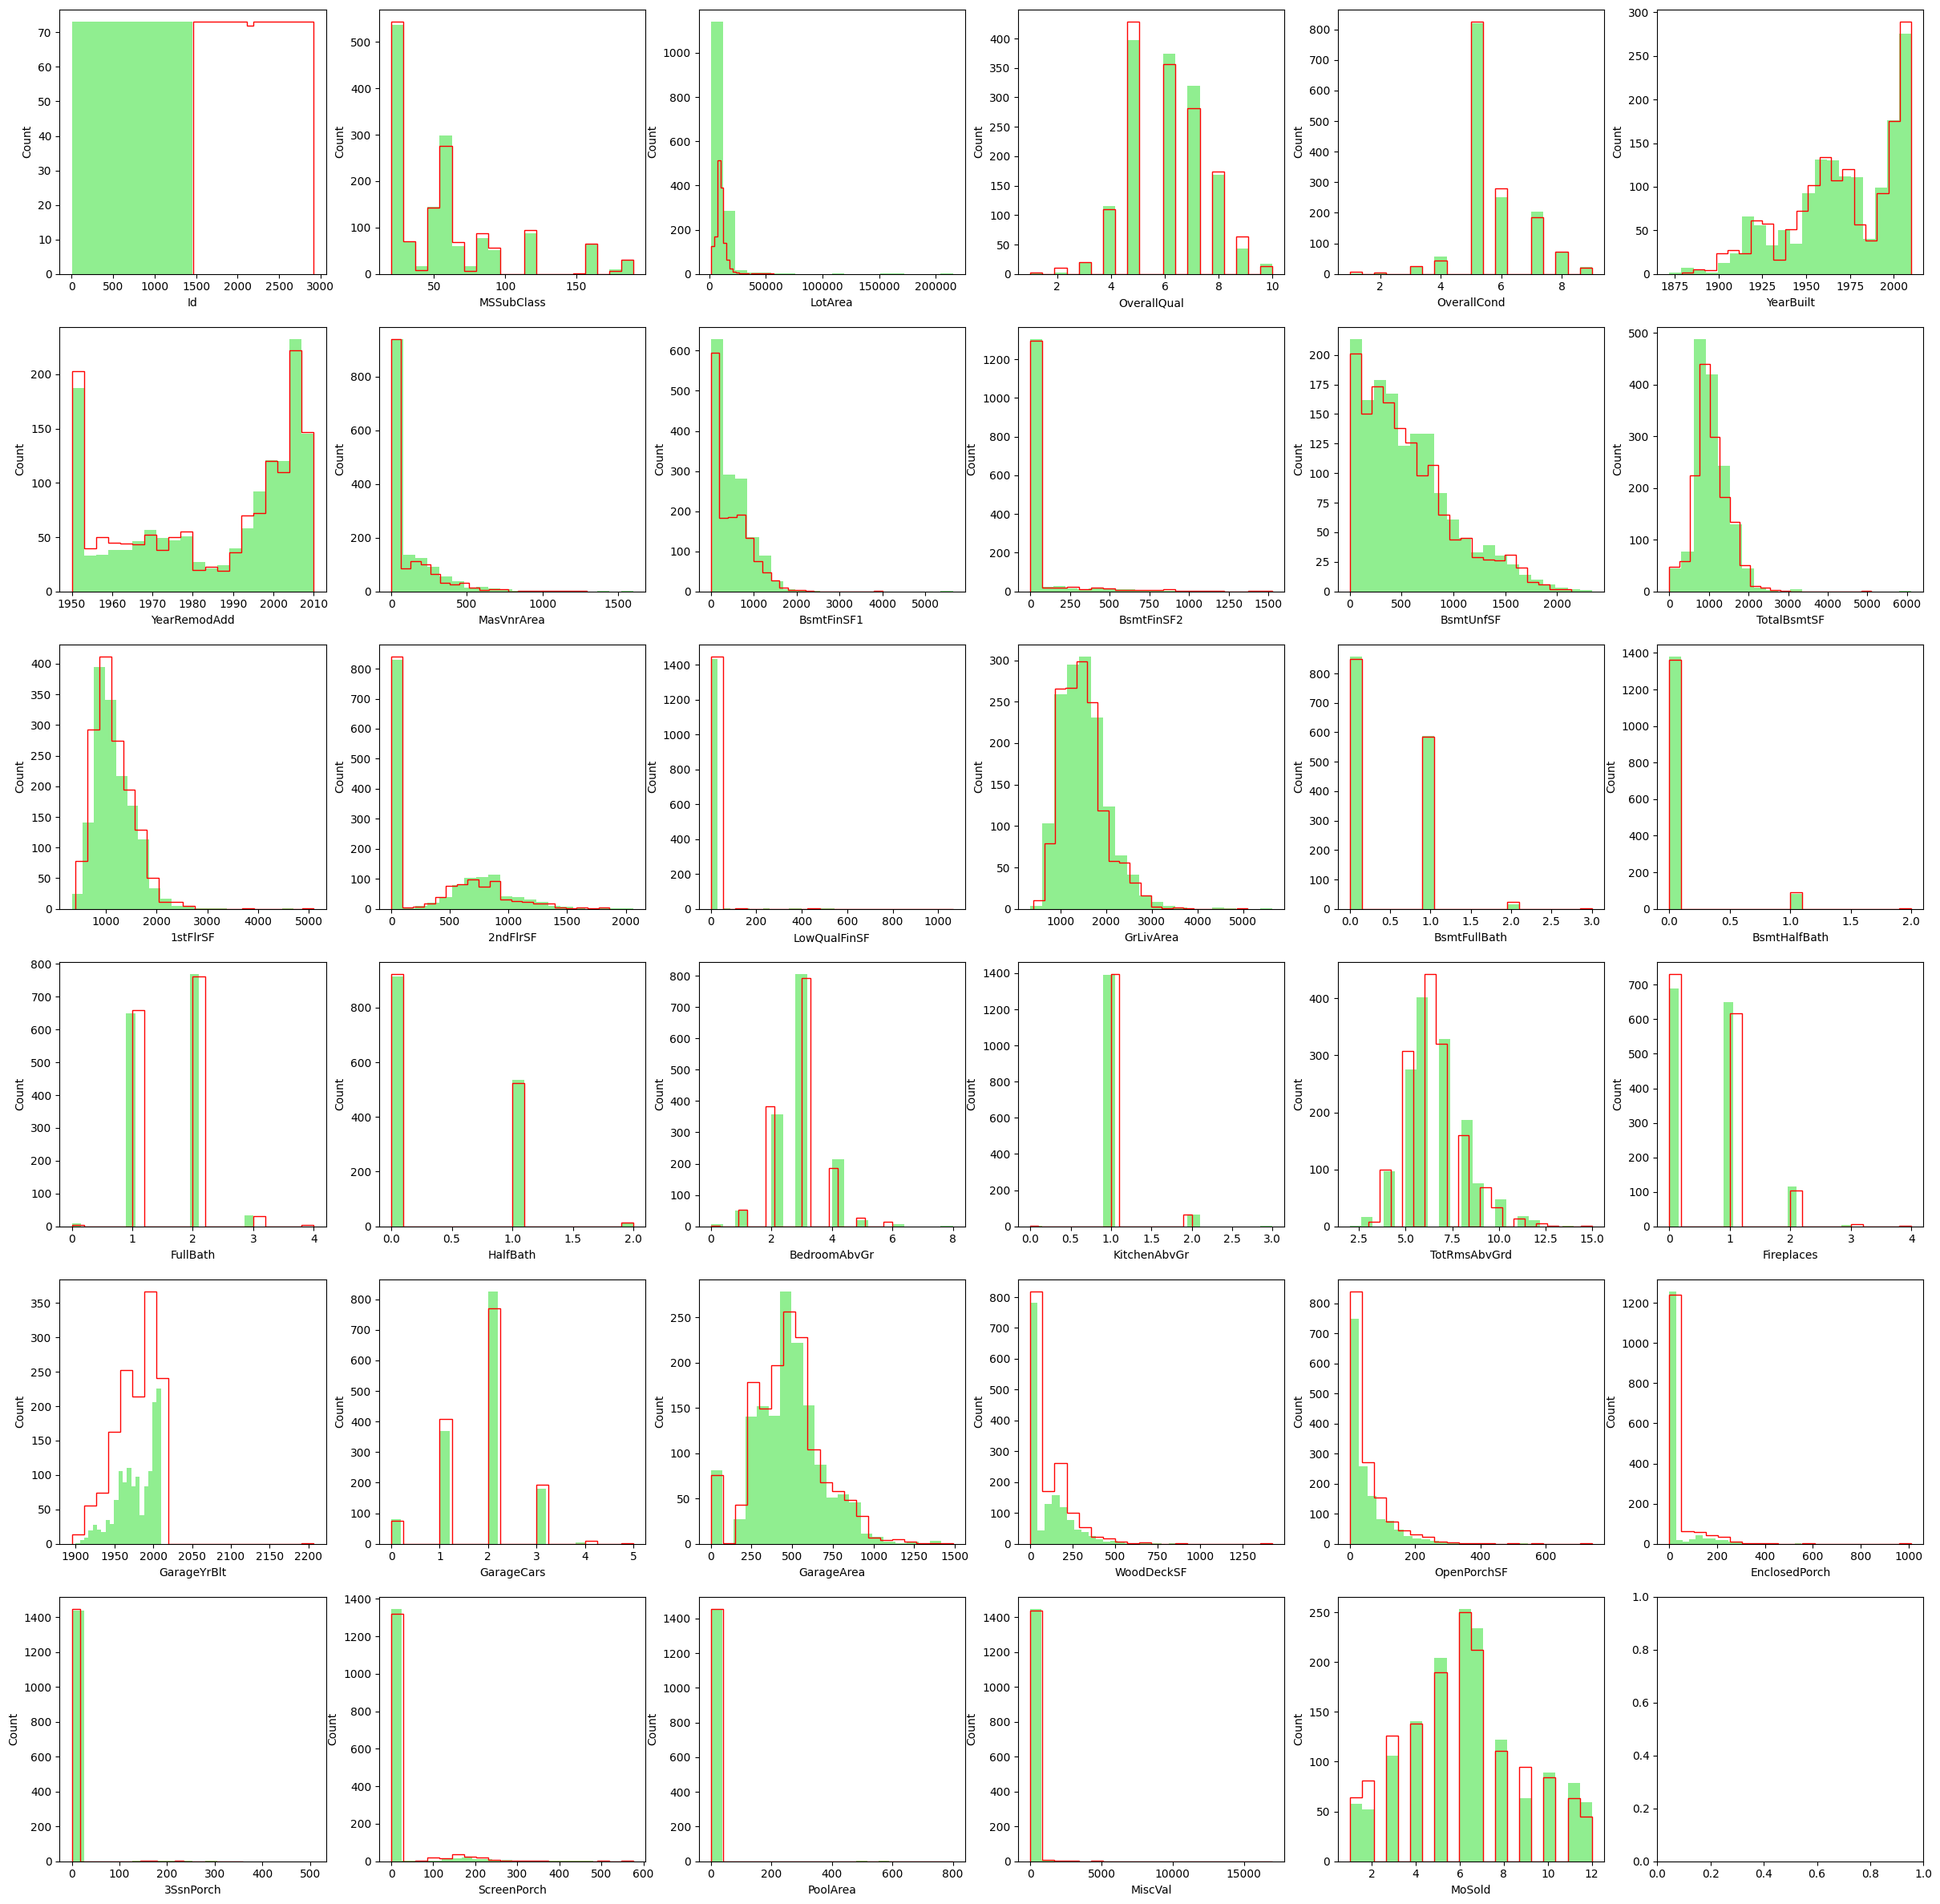

In [11]:
f,ax = plt.subplots(6,6, figsize=(30,30))
k=0
for i in range(6):
    for j in range(6):
        if k<35:
            ax[i][j].hist(data_temp[cont_features[k]], bins=20, histtype='bar', color='LightGreen')
            ax[i][j].hist(test_data[cont_features[k]], bins=20, histtype='step', color='Red')
            ax[i][j].set_xlabel(cont_features[k])
            ax[i][j].set_ylabel('Count')
            k=k+1

plt.show()

Se puede observar que las barras verdes representan los datos de entrenamiento y las rojas los datos de prueba.
Los gráficos anteriores muestran que hay valores atípicos en múltiples categorias, mientras que algunas categorias no son útiles.

Ahora eliminando categorias que no aportan nada util

In [12]:
data_temp.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

In [13]:
test_data.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

In [14]:
#Haciendo actualizacion de las categorias
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

resolviendo valores atipicos

In [18]:
# HAciendo uso del rango intercuartil
def valorAtipico(data_temp, k=3):
    q1, q3 = np.percentile(data_temp, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    valorAtipico = [index for index,x in enumerate(data_temp) if x < lower_bound or x > upper_bound]
    
    return valorAtipico

Numero de valores atipicos estimados

In [21]:
raws = []
for i in cont_features:
    raws += valorAtipico(data_temp[i])


len(set(raws))

67

In [22]:
data_temp.drop(list(set(raws)), axis=0, inplace=True)

Datos continuos vs Precio de venta

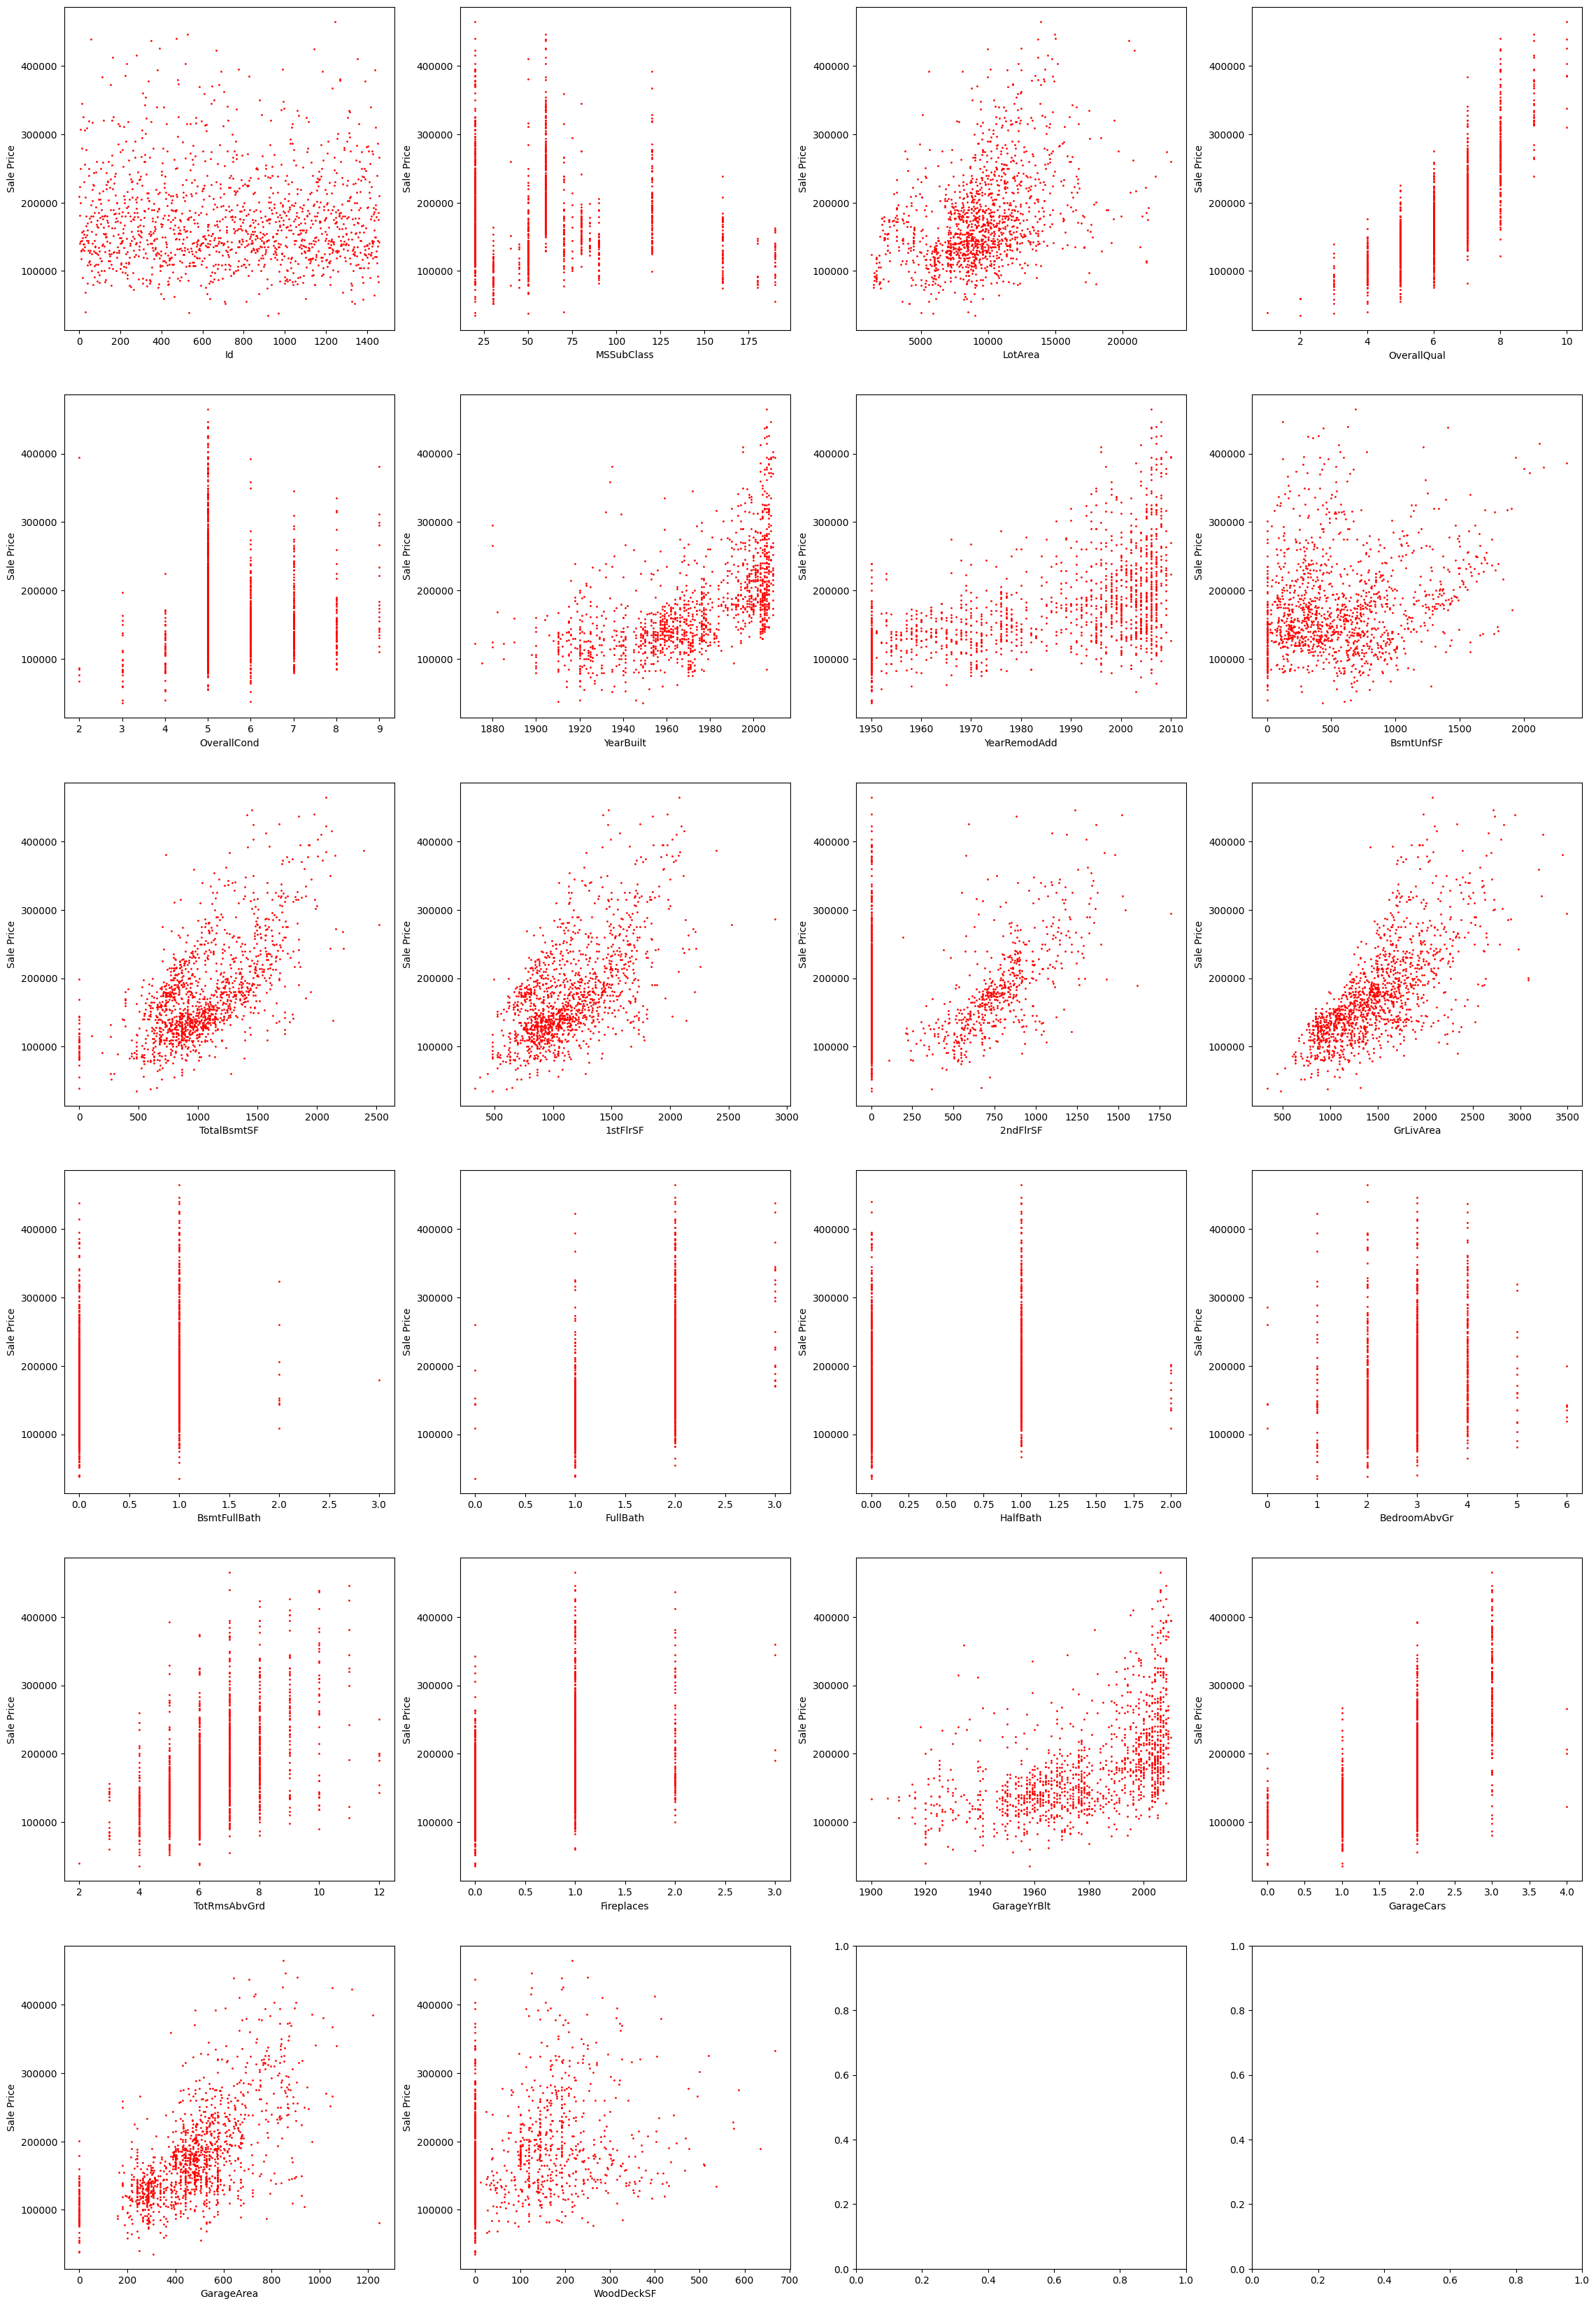

In [24]:
f,ax = plt.subplots(6,4, figsize=(28,42))
k=0
for i in range(6):
    for j in range(4):
        if k<22:
            ax[i][j].scatter(x=cont_features[k], y='SalePrice', data=data_temp, s=1, c='red')
            ax[i][j].set_xlabel(cont_features[k])
            ax[i][j].set_ylabel('Sale Price')
            k=k+1
plt.show()

Ahora Separando datos dependientes e independientes

In [25]:
X = data_temp.iloc[:, :-1]
y = data_temp['SalePrice']

Ahora haciendo la Codificación de los datos categoricos

In [26]:
#actualizando categorias
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

In [27]:
# ahora codificando los datos categoricos
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    # Training Data
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])
    # Test Data
    enc2 = LabelEncoder()
    test_data[i] =enc2.fit_transform(test_data[i])

<Axes: >

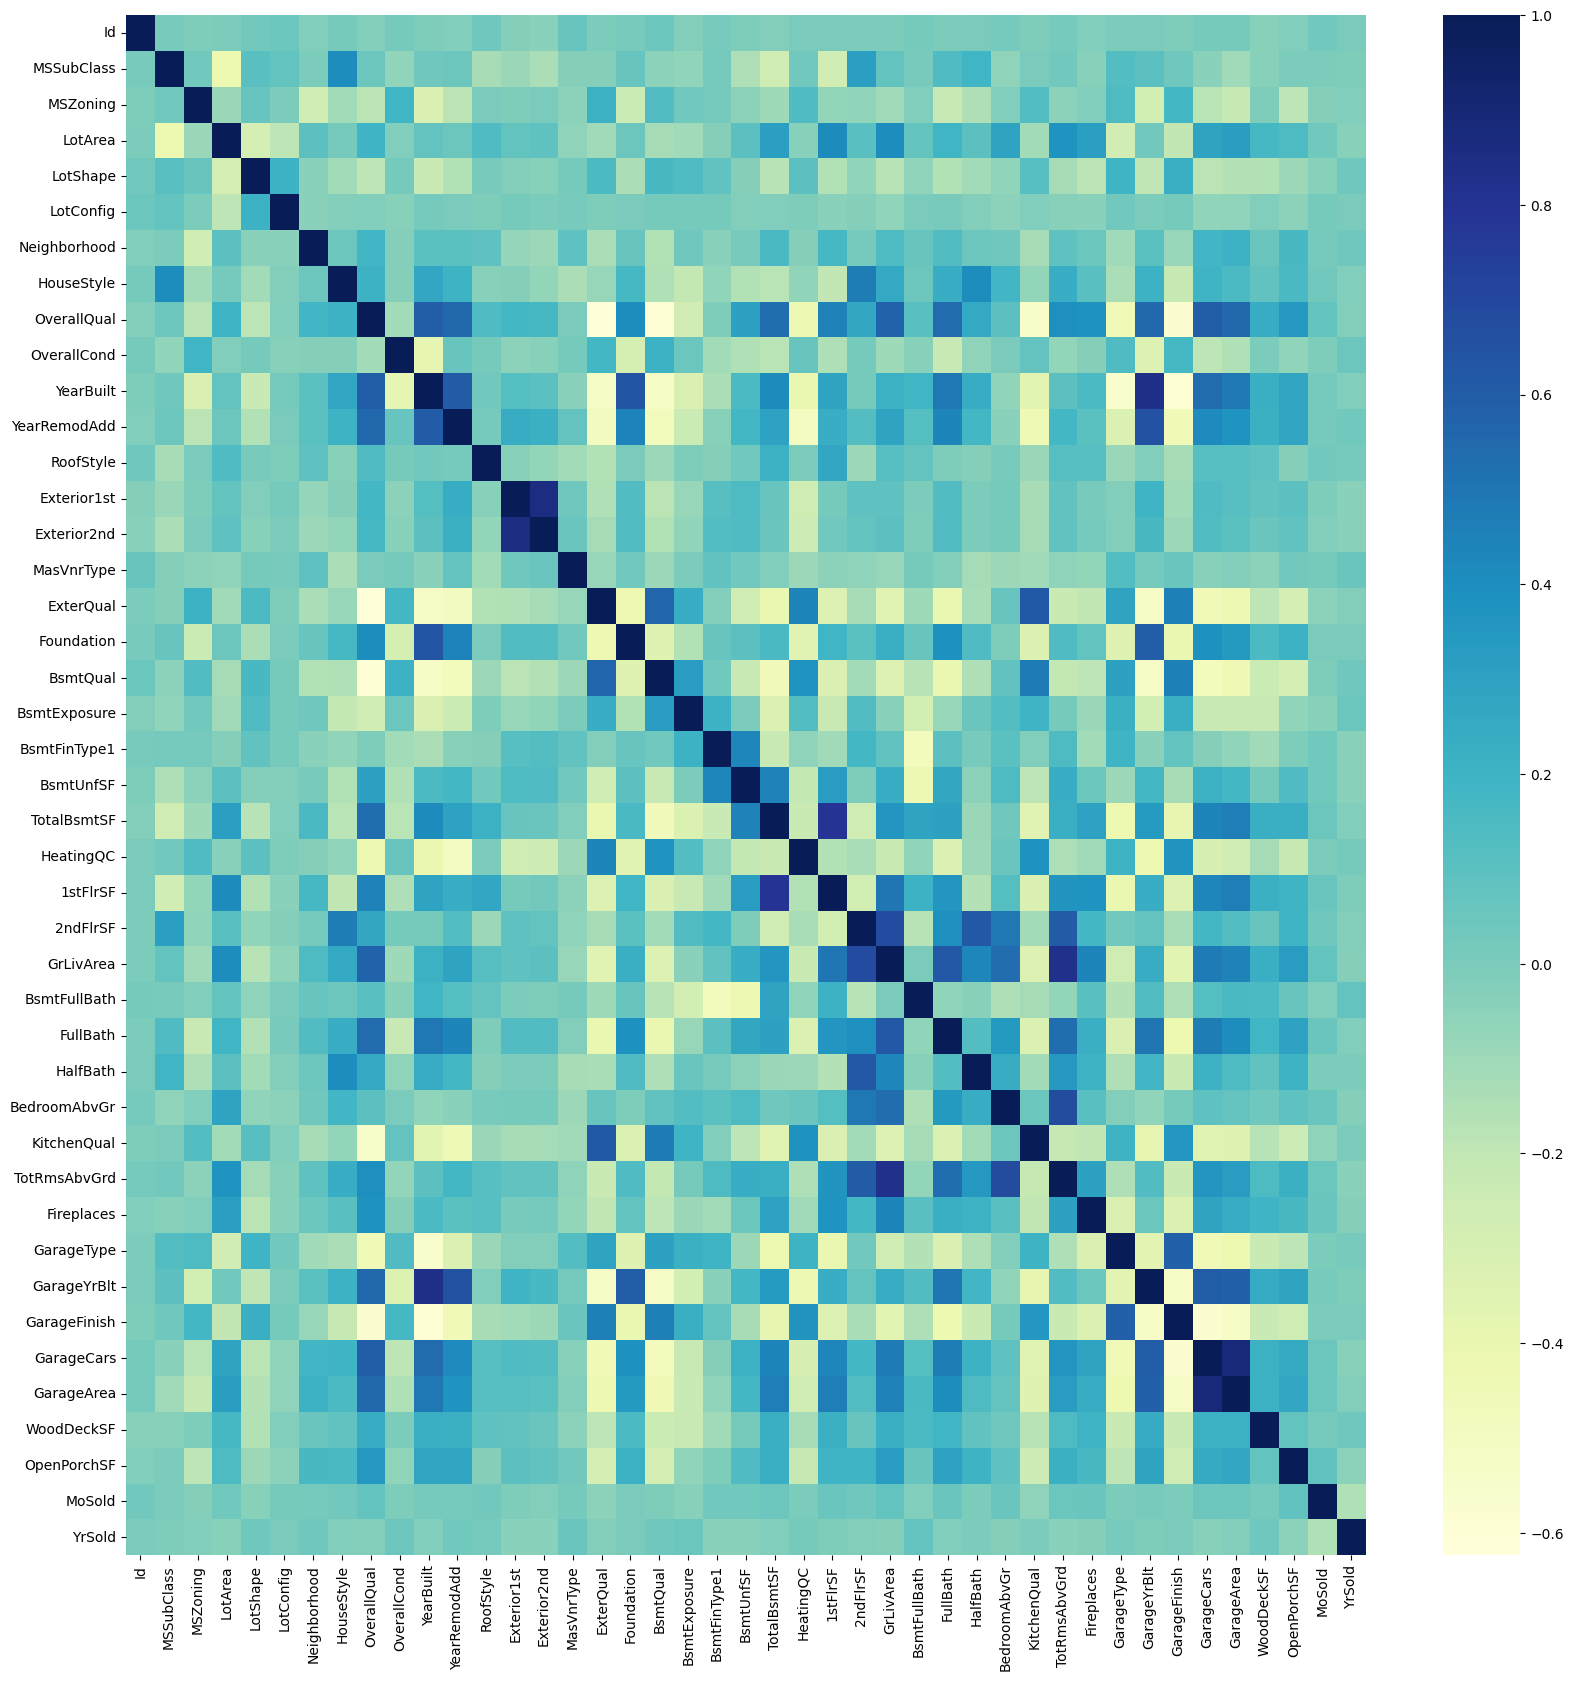

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu')

Resolviendo el problema de los Datos nulos

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
X = imputer.fit_transform(X)
test_data = imputer.transform(test_data)